In [2]:
import json

records = []

with open("metrics_results_default.jsonl", "r", encoding="utf-8") as f:
    for i, line in enumerate(f, 1):
        line = line.strip()
        if not line:
            continue

        try:
            record = json.loads(line)
        except json.JSONDecodeError as e:
            raise RuntimeError(f"Invalid JSON on line {i}") from e

        record.pop("fairness_roc_curves", None)
        records.append(record)

        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122


In [3]:
for record in records:
    print(record)

{'timestamp': '2025-12-15T04:09:46.063425Z', 'alpha': 'logit', 'run': 0, 'dataset': 'all', 'accuracy': 0.9363265142565634, 'precision': 0.5178244041556325, 'roc_auc': 0.836528252633024, 'confusion_matrix': [[1212513, 2367], [80261, 2542]], 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97   1214880\n           1       0.52      0.03      0.06     82803\n\n    accuracy                           0.94   1297683\n   macro avg       0.73      0.51      0.51   1297683\nweighted avg       0.91      0.94      0.91   1297683\n', 'fairness_mean_metrics': {'independence': 0.036762527416146024, 'separation': 0.031952056235593974, 'sufficiency': 7.887754291027442e-07}, 'fairness_std_metrics': {'independence': 0.00012330617321278472, 'separation': 0.00012272732168843437, 'sufficiency': 6.700396639046568e-07}}
{'timestamp': '2025-12-15T04:09:47.201058Z', 'alpha': 'logit', 'run': 0, 'dataset': 'val', 'accuracy': 0.93689780506

In [7]:
import json
from collections import defaultdict

# (dataset, alpha) -> metric -> list
grouped = defaultdict(lambda: defaultdict(list))

with open("metrics_results_default.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        if not line.strip():
            continue

        record = json.loads(line)

        key = (record["dataset"], record["alpha"])

        # performance metrics
        grouped[key]["accuracy"].append(record["accuracy"])
        grouped[key]["precision"].append(record["precision"])
        grouped[key]["roc_auc"].append(record["roc_auc"])

        # fairness metrics
        fm = record["fairness_mean_metrics"]
        grouped[key]["fairness_independence"].append(fm["independence"])
        grouped[key]["fairness_separation"].append(fm["separation"])
        grouped[key]["fairness_sufficiency"].append(fm["sufficiency"])

In [10]:
for k,v in grouped.items():
    print(k, v)

('all', 'logit') defaultdict(<class 'list'>, {'accuracy': [0.9363265142565634], 'precision': [0.5178244041556325], 'roc_auc': [0.836528252633024], 'fairness_independence': [0.036762527416146024], 'fairness_separation': [0.031952056235593974], 'fairness_sufficiency': [7.887754291027442e-07]})
('val', 'logit') defaultdict(<class 'list'>, {'accuracy': [0.9368978050628685], 'precision': [0.5119780971937029], 'roc_auc': [0.8359376165002584], 'fairness_independence': [0.03690284715769672], 'fairness_separation': [0.03213739937245724], 'fairness_sufficiency': [1.1892096361036923e-06]})
('all', 0) defaultdict(<class 'list'>, {'accuracy': [0.9365484482728063, 0.9365068356447607, 0.9364305458266773, 0.9366856158245118, 0.9366886982414041, 0.9365607779403753, 0.9365060650405377, 0.9365484482728063, 0.9367226048272189, 0.9365869784839594], 'precision': [0.5927112535042051, 0.6130458817025981, 0.5993589743589743, 0.5749006777284412, 0.600248678893379, 0.6313768513439386, 0.6112322791712105, 0.62268

C:\Users\bencu\AppData\Local\Temp\ipykernel_6100\1948733642.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


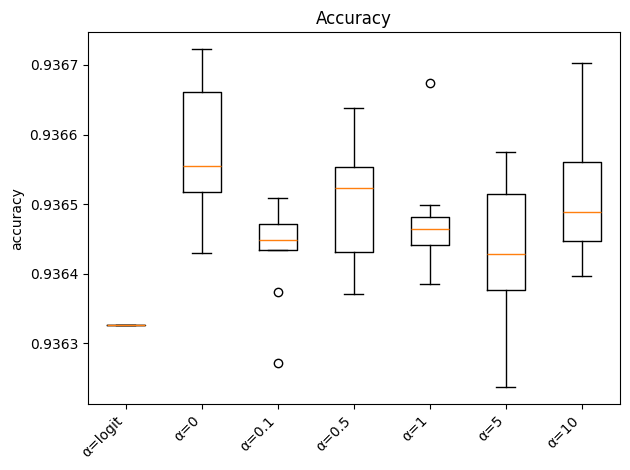

C:\Users\bencu\AppData\Local\Temp\ipykernel_6100\1948733642.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


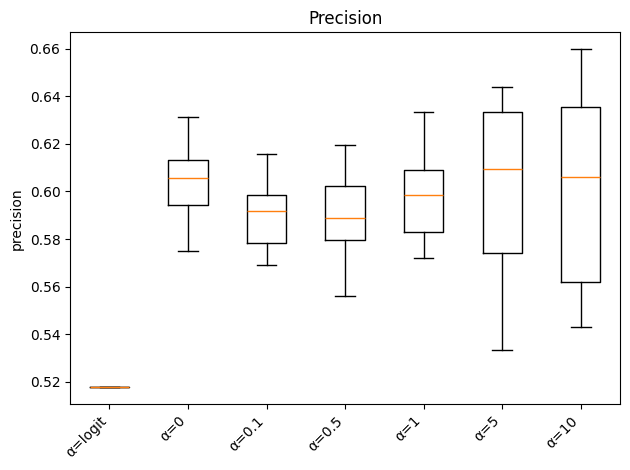

C:\Users\bencu\AppData\Local\Temp\ipykernel_6100\1948733642.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


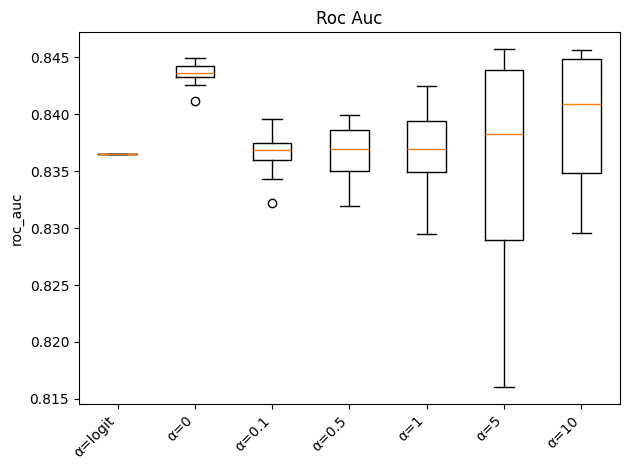

C:\Users\bencu\AppData\Local\Temp\ipykernel_6100\1948733642.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


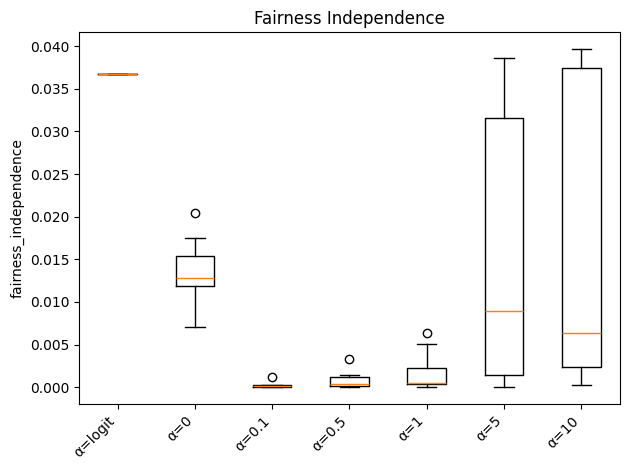

C:\Users\bencu\AppData\Local\Temp\ipykernel_6100\1948733642.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


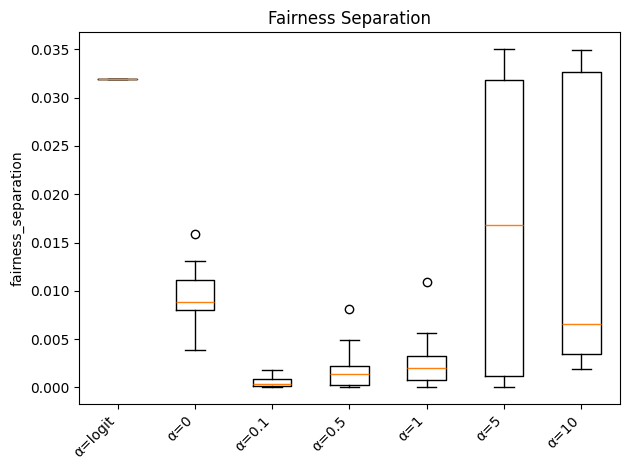

C:\Users\bencu\AppData\Local\Temp\ipykernel_6100\1948733642.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


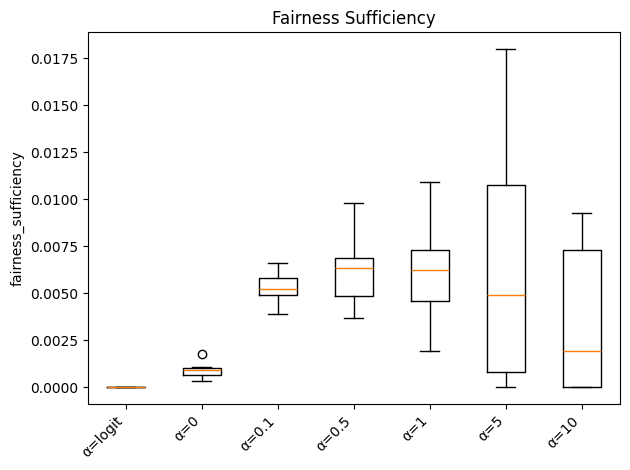

In [12]:
import matplotlib.pyplot as plt

metrics = [
    "accuracy",
    "precision",
    "roc_auc",
    "fairness_independence",
    "fairness_separation",
    "fairness_sufficiency",
]

for metric in metrics:
    labels = []
    data = []

    for (dataset, alpha), values in grouped.items():
        if dataset == "all" and metric in values:
            data.append(values[metric])
            labels.append(f"α={alpha}")

    if not data:
        continue

    plt.figure()
    plt.boxplot(data, labels=labels, showfliers=True)
    plt.title(metric.replace("_", " ").title())
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [13]:
import json
from collections import defaultdict

serializable_grouped = {
    f"{dataset}|{alpha}": metrics for (dataset, alpha), metrics in grouped.items()
}

with open("grouped_metrics.json", "w", encoding="utf-8") as f:
    json.dump(serializable_grouped, f, indent=2)

In [ ]:
import json

with open("grouped_metrics.json", "r", encoding="utf-8") as f:
    loaded = json.load(f)

grouped = {}
for key, metrics in loaded.items():
    dataset, alpha = key.split("|")
    grouped[(dataset, alpha)] = metrics



In [17]:
print(grouped)

{('all', 'logit'): {'accuracy': [0.9363265142565634], 'precision': [0.5178244041556325], 'roc_auc': [0.836528252633024], 'fairness_independence': [0.036762527416146024], 'fairness_separation': [0.031952056235593974], 'fairness_sufficiency': [7.887754291027442e-07]}, ('val', 'logit'): {'accuracy': [0.9368978050628685], 'precision': [0.5119780971937029], 'roc_auc': [0.8359376165002584], 'fairness_independence': [0.03690284715769672], 'fairness_separation': [0.03213739937245724], 'fairness_sufficiency': [1.1892096361036923e-06]}, ('all', '0'): {'accuracy': [0.9365484482728063, 0.9365068356447607, 0.9364305458266773, 0.9366856158245118, 0.9366886982414041, 0.9365607779403753, 0.9365060650405377, 0.9365484482728063, 0.9367226048272189, 0.9365869784839594], 'precision': [0.5927112535042051, 0.6130458817025981, 0.5993589743589743, 0.5749006777284412, 0.600248678893379, 0.6313768513439386, 0.6112322791712105, 0.6226815050344462, 0.5810016458970139, 0.6129458388375165], 'roc_auc': [0.8440117572